In [12]:
import matplotlib.pylab as plt
import time
import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from matplotlib.pyplot import imshow
import numpy as np

In [2]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

# Mnist DNN

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[1]))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model1_0 = Sequential()
model1_0.add(Dense(5, activation='relu',kernel_initializer='normal', input_dim=784))
model1_0.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model1_0.count_params())

model1_1 = Sequential()
model1_1.add(Dense(5, activation='relu',kernel_initializer='normal', input_dim=784))
model1_1.add(Dense(5,kernel_initializer='normal', activation='relu'))
model1_1.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model1_1.count_params())

3985
4015


In [6]:
model2_0 = Sequential()
model2_0.add(Dense(10,kernel_initializer='normal', activation='relu', input_dim=784))
model2_0.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model2_0.count_params())

model2_1 = Sequential()
model2_1.add(Dense(5,kernel_initializer='normal', activation='relu', input_dim=784))
model2_1.add(Dense(25,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(25,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(25,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(25,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(25,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(23,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(20,kernel_initializer='normal', activation='relu'))
model2_1.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model2_1.count_params())

7960
7963


In [7]:
model3_0 = Sequential()
model3_0.add(Dense(20,kernel_initializer='normal', activation='relu', input_dim=784))
model3_0.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model3_0.count_params())

model3_1 = Sequential()
model3_1.add(Dense(15,kernel_initializer='normal', activation='relu', input_dim=784))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(30,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(21,kernel_initializer='normal', activation='relu'))
model3_1.add(Dense(10,kernel_initializer='normal', activation='softmax'))
print(model3_1.count_params())

15910
15916


In [8]:
model1_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
start = time.time()
batch_size = 128
epochs = 50
history1_0 = model1_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history1_1 = model1_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_0 = model2_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_1 = model2_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_0 = model3_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_1 = model3_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print((end - start)/60)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.1325 - acc: 0.6736 - val_loss: 0.5657 - val_acc: 0.8480
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.5045 - acc: 0.8573 - val_loss: 0.4449 - val_acc: 0.8730
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4408 - acc: 0.8743 - val_loss: 0.4112 - val_acc: 0.8804
Epoch 4/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.4153 - acc: 0.8817 - val_loss: 0.3960 - val_acc: 0.8854
Epoch 5/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.3998 - acc: 0.8868 - val_loss: 0.3859 - val_acc: 0.8903
Epoch 6/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.3888 - acc: 0.8899 - val_loss: 0.3784 - val_acc: 0.8916
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.3806 - acc: 0.8915 - val_loss: 0.3712 - val_acc

Epoch 10/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.4319 - acc: 0.8808 - val_loss: 0.4377 - val_acc: 0.8796
Epoch 11/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.4251 - acc: 0.8834 - val_loss: 0.4299 - val_acc: 0.8811
Epoch 12/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.4197 - acc: 0.8848 - val_loss: 0.4368 - val_acc: 0.8813
Epoch 13/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.4153 - acc: 0.8857 - val_loss: 0.4255 - val_acc: 0.8849
Epoch 14/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.4101 - acc: 0.8878 - val_loss: 0.4246 - val_acc: 0.8809
Epoch 15/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.4068 - acc: 0.8884 - val_loss: 0.4205 - val_acc: 0.8866
Epoch 16/50
60000/60000 [==============================] - 1s 13us/step - loss: 0.4039 - acc: 0.8890 - val_loss: 0.4197 - val_acc: 0.8868
Epoch 17/50
60000/60000 [=========

60000/60000 [==============================] - 1s 11us/step - loss: 0.2156 - acc: 0.9390 - val_loss: 0.2356 - val_acc: 0.9322
Epoch 20/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2141 - acc: 0.9392 - val_loss: 0.2331 - val_acc: 0.9343
Epoch 21/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2120 - acc: 0.9391 - val_loss: 0.2315 - val_acc: 0.9316
Epoch 22/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2100 - acc: 0.9400 - val_loss: 0.2304 - val_acc: 0.9339
Epoch 23/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2089 - acc: 0.9400 - val_loss: 0.2338 - val_acc: 0.9336
Epoch 24/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2070 - acc: 0.9410 - val_loss: 0.2317 - val_acc: 0.9320
Epoch 25/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2052 - acc: 0.9409 - val_loss: 0.2301 - val_acc: 0.9325
Epoch 26/50
60000/60000 [=====================

60000/60000 [==============================] - 1s 21us/step - loss: 0.4598 - acc: 0.8719 - val_loss: 0.4807 - val_acc: 0.8701
Epoch 29/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.4534 - acc: 0.8739 - val_loss: 0.4991 - val_acc: 0.8671
Epoch 30/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.4520 - acc: 0.8746 - val_loss: 0.4721 - val_acc: 0.8695
Epoch 31/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.4467 - acc: 0.8771 - val_loss: 0.4780 - val_acc: 0.8672
Epoch 32/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.4427 - acc: 0.8771 - val_loss: 0.4919 - val_acc: 0.8662
Epoch 33/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.4394 - acc: 0.8780 - val_loss: 0.4511 - val_acc: 0.8767
Epoch 34/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.4361 - acc: 0.8790 - val_loss: 0.4626 - val_acc: 0.8752
Epoch 35/50
60000/60000 [=====================

60000/60000 [==============================] - 1s 12us/step - loss: 0.0831 - acc: 0.9759 - val_loss: 0.1501 - val_acc: 0.9599
Epoch 38/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0826 - acc: 0.9756 - val_loss: 0.1500 - val_acc: 0.9593
Epoch 39/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0806 - acc: 0.9761 - val_loss: 0.1500 - val_acc: 0.9597
Epoch 40/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0800 - acc: 0.9762 - val_loss: 0.1481 - val_acc: 0.9604
Epoch 41/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0790 - acc: 0.9763 - val_loss: 0.1461 - val_acc: 0.9613
Epoch 42/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0779 - acc: 0.9776 - val_loss: 0.1497 - val_acc: 0.9611
Epoch 43/50
60000/60000 [==============================] - 1s 12us/step - loss: 0.0768 - acc: 0.9779 - val_loss: 0.1504 - val_acc: 0.9600
Epoch 44/50
60000/60000 [=====================

60000/60000 [==============================] - 1s 19us/step - loss: 0.1216 - acc: 0.9657 - val_loss: 0.2060 - val_acc: 0.9480
Epoch 47/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1215 - acc: 0.9651 - val_loss: 0.2134 - val_acc: 0.9473
Epoch 48/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1214 - acc: 0.9648 - val_loss: 0.2071 - val_acc: 0.9478
Epoch 49/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1170 - acc: 0.9664 - val_loss: 0.2144 - val_acc: 0.9459
Epoch 50/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1155 - acc: 0.9671 - val_loss: 0.2200 - val_acc: 0.9448
4.399125520388285


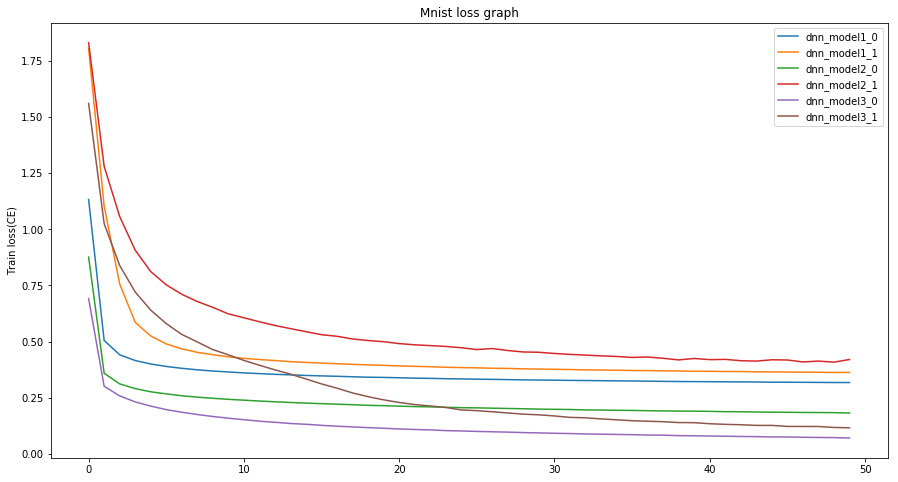

In [10]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist loss graph')
plt.plot(x,history1_0.history['loss'],label = 'dnn_model1_0')
plt.plot(x,history1_1.history['loss'],label = 'dnn_model1_1')
plt.plot(x,history2_0.history['loss'],label = 'dnn_model2_0')
plt.plot(x,history2_1.history['loss'],label = 'dnn_model2_1')
plt.plot(x,history3_0.history['loss'],label = 'dnn_model3_0')
plt.plot(x,history3_1.history['loss'],label = 'dnn_model3_1')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

### Problem
1. something wrong with hidden layer 

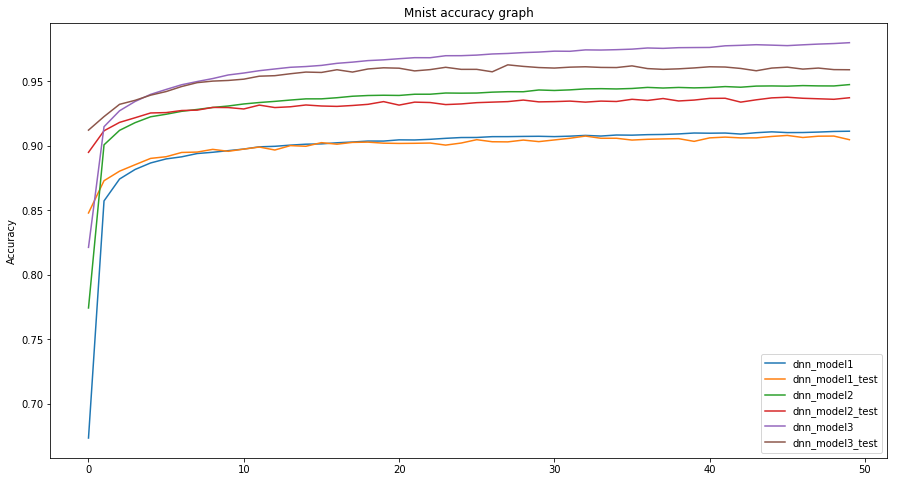

In [11]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist accuracy graph')
plt.plot(x,history1_0.history['acc'],label = 'dnn_model1')
plt.plot(x,history1_0.history['val_acc'],label = 'dnn_model1_test')
plt.plot(x,history2_0.history['acc'],label = 'dnn_model2')
plt.plot(x,history2_0.history['val_acc'],label = 'dnn_model2_test')
plt.plot(x,history3_0.history['acc'],label = 'dnn_model3')
plt.plot(x,history3_0.history['val_acc'],label = 'dnn_model3_test')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### CNN


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model1_0 = Sequential()
model1_0.add(Conv2D(filters = 5, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model1_0.add(MaxPool2D(pool_size=(2,2)))
model1_0.add(Flatten())
model1_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_0.count_params())

model1_1 = Sequential()
model1_1.add(Conv2D(filters = 15, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Conv2D(filters = 11, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Flatten())
model1_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_1.count_params())

9940
9926


In [6]:
model2_0 = Sequential()
model2_0.add(Conv2D(filters = 10, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model2_0.add(MaxPool2D(pool_size=(2,2)))
model2_0.add(Flatten())
model2_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_0.count_params())

model2_1 = Sequential()
model2_1.add(Conv2D(filters = 19, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Flatten())
model2_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_1.count_params())

19870
19824


In [7]:
model3_0 = Sequential()
model3_0.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model3_0.add(MaxPool2D(pool_size=(2,2)))
model3_0.add(Flatten())
model3_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_0.count_params())

model3_1 = Sequential()
model3_1.add(Conv2D(filters = 66, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (28,28,1),kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Conv2D(filters = 29, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Flatten())
model3_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_1.count_params())

63562
63815


In [8]:
model1_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
start = time.time()
batch_size = 128
epochs = 50
history1_0 = model1_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history1_1 = model1_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_0 = model2_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_1 = model2_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_0 = model3_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_1 = model3_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print((end - start)/60)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 1.3136 - acc: 0.8468 - val_loss: 0.1858 - val_acc: 0.9479
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1453 - acc: 0.9569 - val_loss: 0.1168 - val_acc: 0.9646
Epoch 3/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.1000 - acc: 0.9700 - val_loss: 0.0975 - val_acc: 0.9710
Epoch 4/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0808 - acc: 0.9758 - val_loss: 0.0908 - val_acc: 0.9729
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0712 - acc: 0.9788 - val_loss: 0.0864 - val_acc: 0.9764
Epoch 6/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0644 - acc: 0.9800 - val_loss: 0.0878 - val_acc: 0.9774
Epoch 7/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0593 - acc: 0.9806 - val_loss: 0.0820 - val_acc

Epoch 10/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0291 - acc: 0.9906 - val_loss: 0.0578 - val_acc: 0.9854
Epoch 11/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0277 - acc: 0.9914 - val_loss: 0.0547 - val_acc: 0.9858
Epoch 12/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0247 - acc: 0.9922 - val_loss: 0.0598 - val_acc: 0.9847
Epoch 13/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0233 - acc: 0.9924 - val_loss: 0.0681 - val_acc: 0.9849
Epoch 14/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0239 - acc: 0.9927 - val_loss: 0.0654 - val_acc: 0.9847
Epoch 15/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0226 - acc: 0.9930 - val_loss: 0.0668 - val_acc: 0.9854
Epoch 16/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0661 - val_acc: 0.9860
Epoch 17/50
60000/60000 [=========

60000/60000 [==============================] - 1s 14us/step - loss: 0.0231 - acc: 0.9934 - val_loss: 0.1622 - val_acc: 0.9763
Epoch 20/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0256 - acc: 0.9928 - val_loss: 0.1655 - val_acc: 0.9747
Epoch 21/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0256 - acc: 0.9931 - val_loss: 0.1634 - val_acc: 0.9773
Epoch 22/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0226 - acc: 0.9935 - val_loss: 0.1703 - val_acc: 0.9771
Epoch 23/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0245 - acc: 0.9936 - val_loss: 0.1799 - val_acc: 0.9733
Epoch 24/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0198 - acc: 0.9947 - val_loss: 0.1899 - val_acc: 0.9762
Epoch 25/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.0238 - acc: 0.9939 - val_loss: 0.1900 - val_acc: 0.9768
Epoch 26/50
60000/60000 [=====================

60000/60000 [==============================] - 1s 21us/step - loss: 0.0254 - acc: 0.9954 - val_loss: 0.1197 - val_acc: 0.9852
Epoch 29/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0249 - acc: 0.9959 - val_loss: 0.1249 - val_acc: 0.9847
Epoch 30/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0213 - acc: 0.9964 - val_loss: 0.1342 - val_acc: 0.9864
Epoch 31/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0208 - acc: 0.9966 - val_loss: 0.1263 - val_acc: 0.9856
Epoch 32/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0209 - acc: 0.9965 - val_loss: 0.1235 - val_acc: 0.9877
Epoch 33/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0246 - acc: 0.9963 - val_loss: 0.1356 - val_acc: 0.9858
Epoch 34/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.0192 - acc: 0.9969 - val_loss: 0.1440 - val_acc: 0.9870
Epoch 35/50
60000/60000 [=====================

60000/60000 [==============================] - 1s 18us/step - loss: 1.6200 - acc: 0.8989 - val_loss: 1.7530 - val_acc: 0.8902
Epoch 38/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6285 - acc: 0.8984 - val_loss: 1.7123 - val_acc: 0.8932
Epoch 39/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6129 - acc: 0.8995 - val_loss: 1.6897 - val_acc: 0.8948
Epoch 40/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6257 - acc: 0.8987 - val_loss: 1.6901 - val_acc: 0.8943
Epoch 41/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6169 - acc: 0.8993 - val_loss: 1.6529 - val_acc: 0.8969
Epoch 42/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6119 - acc: 0.8995 - val_loss: 1.7068 - val_acc: 0.8935
Epoch 43/50
60000/60000 [==============================] - 1s 18us/step - loss: 1.6069 - acc: 0.8999 - val_loss: 1.6878 - val_acc: 0.8947
Epoch 44/50
60000/60000 [=====================

60000/60000 [==============================] - 3s 47us/step - loss: 3.5483 - acc: 0.7798 - val_loss: 3.4384 - val_acc: 0.7866
Epoch 47/50
60000/60000 [==============================] - 3s 47us/step - loss: 3.5909 - acc: 0.7772 - val_loss: 3.4483 - val_acc: 0.7859
Epoch 48/50
60000/60000 [==============================] - 3s 47us/step - loss: 3.6508 - acc: 0.7734 - val_loss: 3.4557 - val_acc: 0.7856
Epoch 49/50
60000/60000 [==============================] - 3s 47us/step - loss: 3.6251 - acc: 0.7750 - val_loss: 3.6091 - val_acc: 0.7760
Epoch 50/50
60000/60000 [==============================] - 3s 47us/step - loss: 3.6628 - acc: 0.7727 - val_loss: 3.7429 - val_acc: 0.7677
6.673534019788106


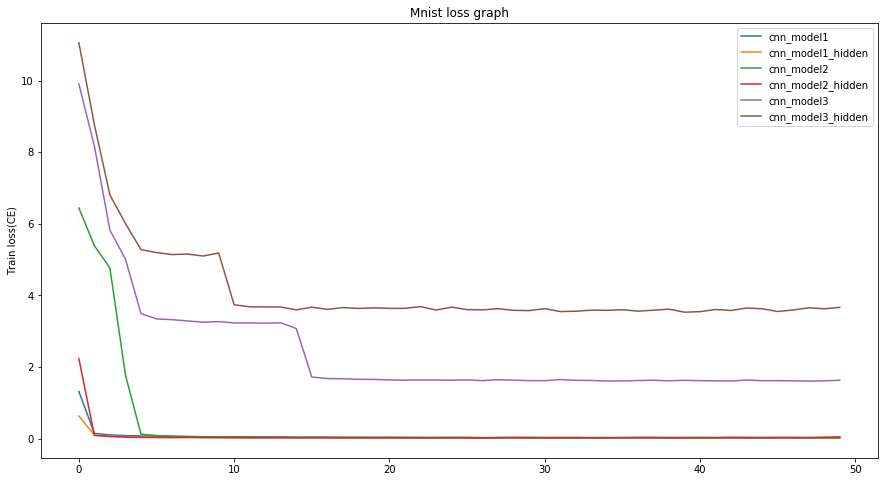

In [10]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist loss graph')
plt.plot(x,history1_0.history['loss'],label = 'cnn_model1')
plt.plot(x,history1_1.history['loss'],label = 'cnn_model1_hidden')
plt.plot(x,history2_0.history['loss'],label = 'cnn_model2')
plt.plot(x,history2_1.history['loss'],label = 'cnn_model2_hidden')
plt.plot(x,history3_0.history['loss'],label = 'cnn_model3')
plt.plot(x,history3_1.history['loss'],label = 'cnn_model3_hidden')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

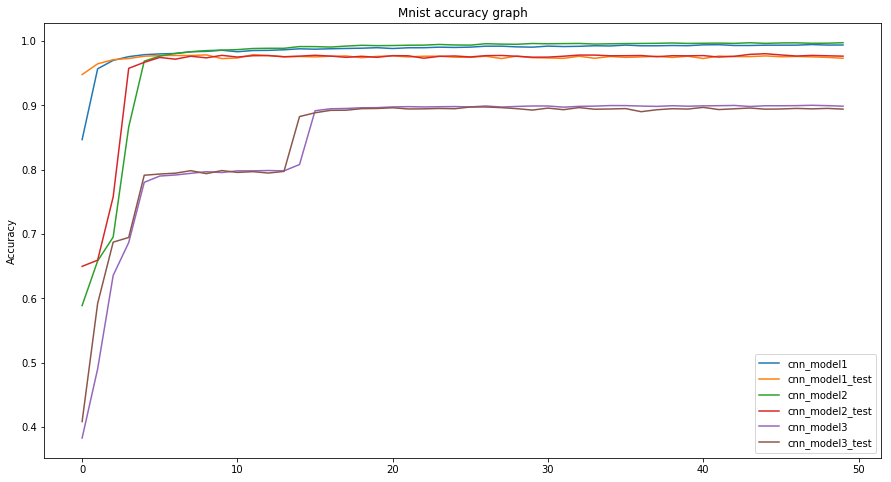

In [11]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('Mnist accuracy graph')
plt.plot(x,history1_0.history['acc'],label = 'cnn_model1')
plt.plot(x,history1_0.history['val_acc'],label = 'cnn_model1_test')
plt.plot(x,history2_0.history['acc'],label = 'cnn_model2')
plt.plot(x,history2_0.history['val_acc'],label = 'cnn_model2_test')
plt.plot(x,history3_0.history['acc'],label = 'cnn_model3')
plt.plot(x,history3_0.history['val_acc'],label = 'cnn_model3_test')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### Problem
1. model1 is better than model2 and model3,but model1 has the least parameters
2. something wrong with model3 

# CIFAR10

In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train /= 255
# x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples


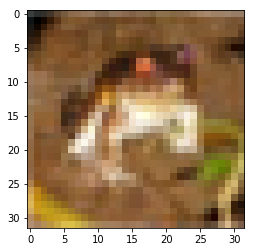

In [17]:
imshow(x_train[0])

In [18]:
x_train = x_train/255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [48]:
model1_0 = Sequential()
model1_0.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model1_0.add(MaxPool2D(pool_size=(2,2)))
model1_0.add(Flatten())
model1_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_0.count_params())

model1_1 = Sequential()
model1_1.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Conv2D(filters = 40, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model1_1.add(MaxPool2D(pool_size=(2,2)))
model1_1.add(Flatten())
model1_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model1_1.count_params())

42186
42866


In [49]:
model2_0 = Sequential()
model2_0.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model2_0.add(MaxPool2D(pool_size=(2,2)))
model2_0.add(Flatten())
model2_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_0.count_params())

model2_1 = Sequential()
model2_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
               activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Conv2D(filters = 57, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model2_1.add(MaxPool2D(pool_size=(2,2)))
model2_1.add(Flatten())
model2_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model2_1.count_params())

84362
84579


In [57]:
model3_0 = Sequential()
model3_0.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model3_0.add(MaxPool2D(pool_size=(2,2)))
model3_0.add(Flatten())
model3_0.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_0.count_params())

model3_1 = Sequential()
model3_1.add(Conv2D(filters = 76, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',input_shape = (32,32,3),kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu',kernel_initializer='normal'))
model3_1.add(MaxPool2D(pool_size=(2,2)))
model3_1.add(Flatten())
model3_1.add(Dense(10, activation = "softmax",kernel_initializer='normal'))
print(model3_1.count_params())

168714
168410


In [58]:
model1_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_0.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model3_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
start = time.time()
batch_size = 128
epochs = 50
history1_0 = model1_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history1_1 = model1_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_0 = model2_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history2_1 = model2_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_0 = model3_0.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
history3_1 = model3_1.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
end = time.time()
print((end - start)/60)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7409 - acc: 0.3827 - val_loss: 1.5150 - val_acc: 0.4743
Epoch 2/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.4178 - acc: 0.5061 - val_loss: 1.3628 - val_acc: 0.5162
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3078 - acc: 0.5438 - val_loss: 1.3097 - val_acc: 0.5448
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2455 - acc: 0.5680 - val_loss: 1.2520 - val_acc: 0.5607
Epoch 5/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1931 - acc: 0.5840 - val_loss: 1.2041 - val_acc: 0.5768
Epoch 6/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1436 - acc: 0.6041 - val_loss: 1.1941 - val_acc: 0.5771
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.1087 - acc: 0.6161 - val_loss: 1.1696 - val_acc

Epoch 10/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8133 - acc: 0.7221 - val_loss: 0.9402 - val_acc: 0.6830
Epoch 11/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.7886 - acc: 0.7289 - val_loss: 0.9697 - val_acc: 0.6723
Epoch 12/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.7641 - acc: 0.7369 - val_loss: 0.9355 - val_acc: 0.6848
Epoch 13/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.7379 - acc: 0.7473 - val_loss: 0.9504 - val_acc: 0.6806
Epoch 14/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.7230 - acc: 0.7515 - val_loss: 0.9426 - val_acc: 0.6799
Epoch 15/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.7037 - acc: 0.7595 - val_loss: 0.9508 - val_acc: 0.6825
Epoch 16/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.6842 - acc: 0.7661 - val_loss: 0.9649 - val_acc: 0.6776
Epoch 17/50
50000/50000 [=========

50000/50000 [==============================] - 2s 40us/step - loss: 0.7388 - acc: 0.7461 - val_loss: 1.0536 - val_acc: 0.6457
Epoch 20/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.7288 - acc: 0.7484 - val_loss: 1.0589 - val_acc: 0.6484
Epoch 21/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.7136 - acc: 0.7541 - val_loss: 1.0503 - val_acc: 0.6482
Epoch 22/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.7031 - acc: 0.7589 - val_loss: 1.0731 - val_acc: 0.6455
Epoch 23/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.6920 - acc: 0.7596 - val_loss: 1.0403 - val_acc: 0.6587
Epoch 24/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.6768 - acc: 0.7687 - val_loss: 1.0711 - val_acc: 0.6495
Epoch 25/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.6686 - acc: 0.7705 - val_loss: 1.0671 - val_acc: 0.6503
Epoch 26/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 54us/step - loss: 0.2593 - acc: 0.9098 - val_loss: 1.2046 - val_acc: 0.6977
Epoch 29/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.2487 - acc: 0.9143 - val_loss: 1.2291 - val_acc: 0.6981
Epoch 30/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.2305 - acc: 0.9216 - val_loss: 1.2513 - val_acc: 0.6972
Epoch 31/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.2258 - acc: 0.9222 - val_loss: 1.3055 - val_acc: 0.6993
Epoch 32/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.2119 - acc: 0.9262 - val_loss: 1.3053 - val_acc: 0.6979
Epoch 33/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.2082 - acc: 0.9265 - val_loss: 1.3628 - val_acc: 0.6952
Epoch 34/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.1883 - acc: 0.9363 - val_loss: 1.3682 - val_acc: 0.6993
Epoch 35/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 48us/step - loss: 0.2631 - acc: 0.9167 - val_loss: 1.4551 - val_acc: 0.6429
Epoch 38/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.2565 - acc: 0.9193 - val_loss: 1.4554 - val_acc: 0.6414
Epoch 39/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.2393 - acc: 0.9269 - val_loss: 1.5124 - val_acc: 0.6390
Epoch 40/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.2309 - acc: 0.9293 - val_loss: 1.5349 - val_acc: 0.6383
Epoch 41/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.2179 - acc: 0.9357 - val_loss: 1.5679 - val_acc: 0.6375
Epoch 42/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.2104 - acc: 0.9381 - val_loss: 1.5351 - val_acc: 0.6424
Epoch 43/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.2086 - acc: 0.9368 - val_loss: 1.5877 - val_acc: 0.6397
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 85us/step - loss: 0.0637 - acc: 0.9777 - val_loss: 2.1840 - val_acc: 0.6908
Epoch 47/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.0687 - acc: 0.9757 - val_loss: 2.2279 - val_acc: 0.6916
Epoch 48/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.0658 - acc: 0.9771 - val_loss: 2.3144 - val_acc: 0.6814
Epoch 49/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.0710 - acc: 0.9742 - val_loss: 2.2940 - val_acc: 0.6929
Epoch 50/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.0637 - acc: 0.9775 - val_loss: 2.2434 - val_acc: 0.6949
13.504472355047861


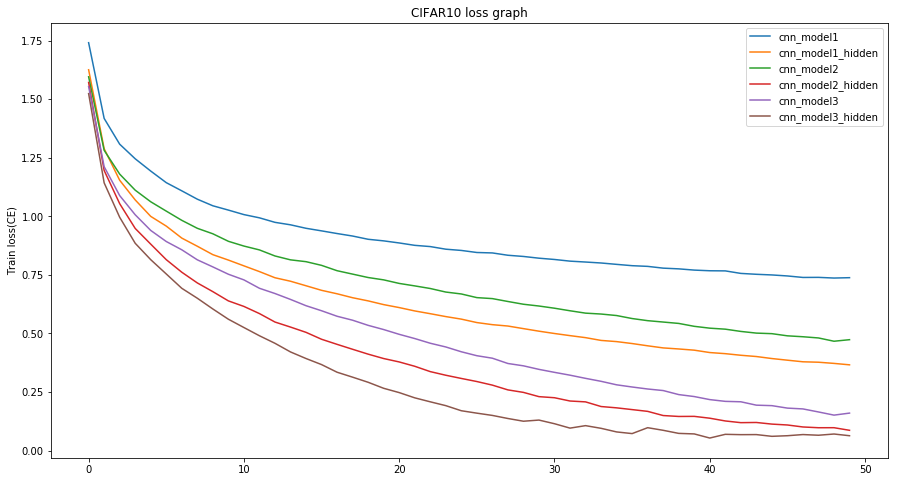

In [60]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('CIFAR10 loss graph')
plt.plot(x,history1_0.history['loss'],label = 'cnn_model1')
plt.plot(x,history1_1.history['loss'],label = 'cnn_model1_hidden')
plt.plot(x,history2_0.history['loss'],label = 'cnn_model2')
plt.plot(x,history2_1.history['loss'],label = 'cnn_model2_hidden')
plt.plot(x,history3_0.history['loss'],label = 'cnn_model3')
plt.plot(x,history3_1.history['loss'],label = 'cnn_model3_hidden')
plt.ylabel('Train loss(CE)')
plt.legend(loc = 'upper right')
plt.show()

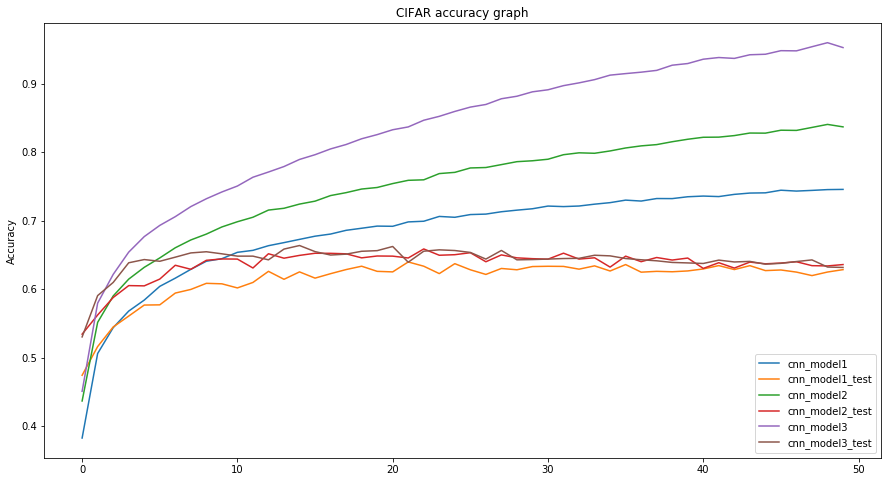

In [61]:
x = [i for i in range(epochs)]
plt.figure(figsize = (15,8))
plt.title('CIFAR accuracy graph')
plt.plot(x,history1_0.history['acc'],label = 'cnn_model1')
plt.plot(x,history1_0.history['val_acc'],label = 'cnn_model1_test')
plt.plot(x,history2_0.history['acc'],label = 'cnn_model2')
plt.plot(x,history2_0.history['val_acc'],label = 'cnn_model2_test')
plt.plot(x,history3_0.history['acc'],label = 'cnn_model3')
plt.plot(x,history3_0.history['val_acc'],label = 'cnn_model3_test')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### Problem
1. overfitting